<h1 style="background: blue; color:white;padding:10px;border: 4px solid white;">Damian's Final Project v2 latest new final 2 copy</h1>

## Predicting Voting patern per county, age, income and other factors
<img src="https://s7d2.scene7.com/is/image/TWCNews/Getty_Vote_Ballot_Election">

### import the usual suspects

In [32]:
#Make sure all libraries are installed
!pip install -U pandas numpy seaborn scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
sns.set()

### reading the data

In [3]:
votes = pd.read_csv("https://raw.githubusercontent.com/thedamian/Data_Analytics_Class_FInal/main/2020%20Presidental%20Vote%20-%20Damian%20Final%20Project.csv",index_col=0)


### show sample of data


In [4]:
votes.head()

,Trump,Biden,Per Capita Personal Income 2020,2022 Population,Growth Rate,Population Density
County,,,,,,
Alachua,50972,89704,49556,284694,15.1041,325.3446
Baker,11911,2037,36552,28487,5.0599,48.6765
Bay,66097,25614,50696,176488,4.5223,232.6926
Bradford,10334,3160,36301,28259,-0.9151,96.1305
Brevard,207883,148549,51507,619260,13.9653,609.8479


### Let's see if we have any missing data

In [6]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Alachua to Washington
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Trump                            67 non-null     int64  
 1   Biden                            67 non-null     int64  
 2   Per Capita Personal Income 2020  67 non-null     int64  
 3   2022 Population                  67 non-null     int64  
 4   Growth Rate                      67 non-null     float64
 5   Population Density               67 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 3.7+ KB


In [9]:
votes.describe()

,Trump,Biden,Per Capita Personal Income 2020,2022 Population,Growth Rate,Population Density
count,67.000000,67.000000,67.000000,6.700000e+01,67.000000,67.000000
mean,84607.925373,79060.373134,47643.656716,3.296352e+05,11.728604,393.713457
std,104878.142017,134213.651069,17177.276606,5.121706e+05,15.002890,584.146386
min,2846.000000,510.000000,24593.000000,7.896000e+03,-12.639500,9.449900
25%,8196.500000,3822.000000,36327.500000,2.837300e+04,0.277000,49.853100
50%,50972.000000,27092.000000,44065.000000,1.370180e+05,9.933800,193.411600
75%,125114.000000,89935.000000,52121.500000,3.939670e+05,20.197650,463.064350
max,532833.000000,618752.000000,106583.000000,2.742833e+06,53.581300,3534.124200


### Create a function for defining who "won"

In [7]:
def whoWon(cols):
    trumpVotes = int(cols[0])  # change text to numbers
    bidenVotes = int(cols[1])  # because the csv content comes in as text
    if (trumpVotes > bidenVotes):
        return "R"
    else:
        return "D"


### Add the new "Winner" column using that whoWon function

In [8]:
votes["Winner"] = votes[["Trump","Biden"]].apply(whoWon,axis=1)

In [9]:
votes.head(50)

,Trump,Biden,Per Capita Personal Income 2020,2022 Population,Growth Rate,Population Density,Winner
County,,,,,,,
Alachua,50972,89704,49556,284694,15.1041,325.3446,D
Baker,11911,2037,36552,28487,5.0599,48.6765,R
Bay,66097,25614,50696,176488,4.5223,232.6926,R
Bradford,10334,3160,36301,28259,-0.9151,96.1305,R
Brevard,207883,148549,51507,619260,13.9653,609.8479,R
Broward,333409,618752,55908,1983637,13.4761,1643.4076,D
Calhoun,5274,1209,32264,13452,-8.0205,23.7109,R
Charlotte,73243,42273,45606,192221,20.1546,282.2225,R
Citrus,65352,27092,41933,156365,10.7119,268.7169,R


### Corolations here we come!

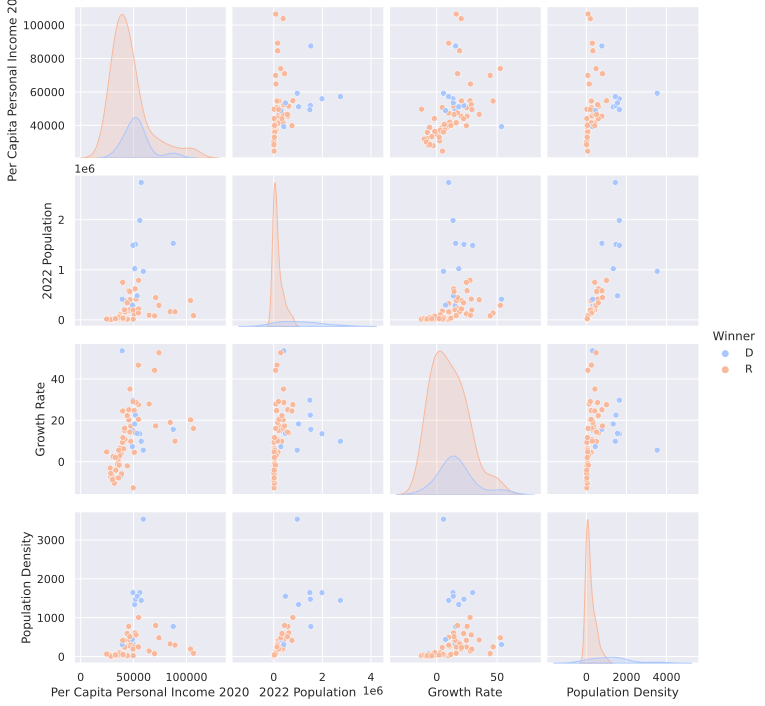

In [10]:
sns.pairplot(votes.drop(["Trump","Biden"],axis=1),hue="Winner", palette="coolwarm")

# It's time to send in the robots

```       _
      [ ]
     (   )
      |>|
   __/===\__
  //| o=o |\\
<]  | o=o |  [>
    \=====/
   / / | \ \
  <_________>```

#  Everyone split up we need to find a patern

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(votes.drop(["Trump","Biden","Winner"], axis=1), votes['Winner'], test_size=0.30, random_state=42)

# Which AI Robot Will help us the best
### how About Logistic Regression
```
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⡀⢸⣿⣷⠀⠀⠀⠀⠀⠀⣠⣄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣧⠈⣿⣿⡆⠀⠀⠀⠀⣼⣿⣿⠀⣤⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⡀⢹⣿⣧⠀⠀⠀⣸⣿⣿⠃⣰⣿⣿⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⣿⣇⠘⣿⣿⡄⠀⢀⣿⣿⡏⢠⣿⣿⡏⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣿⣿⡀⢻⣿⣧⠀⣸⣿⡟⢀⣾⣿⡿⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣇⣸⣿⣿⣶⣿⣿⠁⣼⣿⣿⠁⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢀⣀⣀⣀⠀⠀⠀⢹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠙⢿⣿⣿⣷⣦⣀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⣿⣿⣿⣿⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠛⠛⠛⠛⠛⠛⠛⠃⠀⠀⠀⠀⠀⠀⠀⠀
```
"It's logical, Captain"

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression( max_iter=10000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [21]:
y_predict = logmodel.predict(X_test)

# Evaluation of Linear Regression

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           D       0.50      0.33      0.40         3
           R       0.89      0.94      0.92        18

    accuracy                           0.86        21
   macro avg       0.70      0.64      0.66        21
weighted avg       0.84      0.86      0.84        21



In [24]:
print(confusion_matrix(y_test, y_predict))

[[ 1  2]
 [ 1 17]]


<AxesSubplot: >

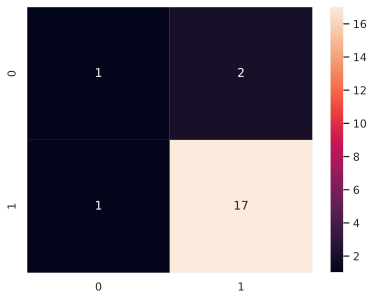

In [25]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

# Bring in the Vectors
```
───────────▄▄▄▄▄▄▄▄▄▄▄▄▄
────────▄▀▀─────────────▀▀▄
───────█───────────────────█
──────█─────────────────────█
─────█───▄▄▄▄▄▄▄───▄▄▄▄▄▄▄───█
────█───█████████─█████████───█
────█──██▀────▀█████▀────▀██──█
───██████───█▀█─███───█▀█─██████
───██████───▀▀▀─███───▀▀▀─██████
────█──▀█▄────▄██─██▄────▄█▀──█
────█────▀█████▀───▀█████▀────█
────█───────────────▄▄▄───────█
────█───────▄▄▄▄██▀▀█▀▀█▄─────█
────█─────▄██▄█▄▄█▄▄█▄▄██▄────█
────█─────▀▀█████████████▀────█
───▐▓▓▌─────────────────────▐▓▓▌
───▐▐▓▓▌▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▐▓▓▌▌
───█══▐▓▄▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▄▓▌══█
──█══▌═▐▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▌═▐══█
──█══█═▐▓▓▓▓▓▓▄▄▄▄▄▄▄▓▓▓▓▓▓▌═█══█
──█══█═▐▓▓▓▓▓▓▐██▀██▌▓▓▓▓▓▓▌═█══█
──█══█═▐▓▓▓▓▓▓▓▀▀▀▀▀▓▓▓▓▓▓▓▌═█══█

──█───█─█──█─█▀▀█─▀▀█▀▀─▀█─█─▀█──
──█▄█▄█─█▀▀█─█▄▄█───█───█▀─▀─█▀──
───▀─▀──▀──▀─▀──▀───▀───▄──▄─▄───
```

## Well... More like the SUpport Vector Classifiers


In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC()

In [28]:
model.fit(X_train,y_train)

SVC()

## Any better?????

In [29]:
y_predict = model.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_predict))

[[ 1  2]
 [ 0 18]]


In [31]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           D       1.00      0.33      0.50         3
           R       0.90      1.00      0.95        18

    accuracy                           0.90        21
   macro avg       0.95      0.67      0.72        21
weighted avg       0.91      0.90      0.88        21



# We have a winner!

```
                                  ___________
                             .---'::'        `---.
                            (::::::'              )
                            |`-----._______.-----'|
                            |              :::::::|
                           .|               ::::::!-.
                           \|               :::::/|/
                            |               ::::::|
                            | Special Flonk Award:|
                            |    for Silliness::::|
                            |               ::::::|
                            |              .::::::|
                            J              :::::::F
                             \            :::::::/
                              `.        .:::::::'
                                `-._  .::::::-'
____________________________________|  """|"_________________________________________
                                    |  :::|
                                    F   ::J
                                   /     ::\
                              __.-'      :::`-.__
                             (_           ::::::_)
                               `"""---------"""'
```